<a href="https://colab.research.google.com/github/athu-lya/Assignment1/blob/main/Athulya_Case_study_on_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Case Study on Regression**

The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making. Find the best linear relationship between year and price. Can you predict the possible price of a 2022 model second-hand grand i10? Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better



In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
data=pd.read_csv('/content/car_age_price (1).csv')

In [3]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [4]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [7]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [8]:
data.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


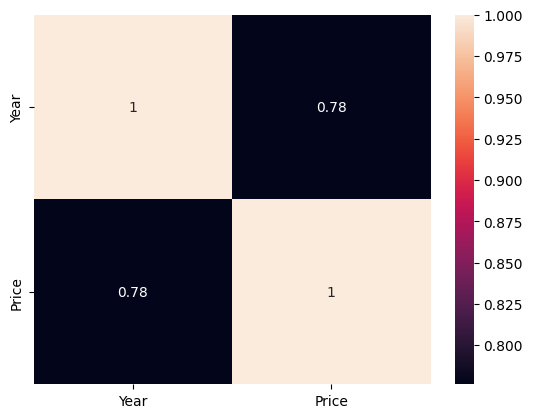

In [9]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [10]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Year'],data['Price'], test_size=0.25)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((84,), (84,), (28,), (28,))

In [11]:
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)
y_train = np.expand_dims(y_train, axis=1)
y_test= np.expand_dims(y_test, axis=1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((84, 1), (84, 1), (28, 1), (28, 1))

In [12]:
#linear regression model
from sklearn.linear_model import LinearRegression
#creating the model
lr = LinearRegression()
#Fitting the model
lr.fit(X_train, y_train)
#making predictions
y_pred = lr.predict(X_test)
y_pred

array([[371410.73620899],
       [543083.21688943],
       [457246.97654921],
       [500165.09671932],
       [500165.09671932],
       [500165.09671932],
       [328492.61603889],
       [500165.09671932],
       [586001.33705954],
       [414328.85637911],
       [500165.09671932],
       [500165.09671932],
       [414328.85637911],
       [543083.21688943],
       [500165.09671932],
       [328492.61603889],
       [628919.45722964],
       [500165.09671932],
       [414328.85637911],
       [500165.09671932],
       [414328.85637911],
       [500165.09671932],
       [328492.61603889],
       [586001.33705954],
       [628919.45722964],
       [543083.21688943],
       [500165.09671932],
       [500165.09671932]])

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model(model,y_pred, y_true=y_test):
  print(f"Mean Absolute Error : {mean_absolute_error(y_true, y_pred)}")
  print(f"Mean Squared Error : {mean_squared_error(y_true, y_pred)}")
  print(f"R2 Score : {r2_score(y_true, y_pred)}")

evaluate_model(lr,y_pred=y_pred)

Mean Absolute Error : 42549.999266620194
Mean Squared Error : 2912763060.5858645
R2 Score : 0.7018819999152335


In [15]:
#Lasso Regression
from sklearn.linear_model import Lasso
L=Lasso()
L.fit(X_train,y_train)
y_pred_lasso = L.predict(X_test)
y_pred_lasso

array([371411.88955043, 543082.65552858, 457247.2725395 , 500164.96403404,
       500164.96403404, 500164.96403404, 328494.19805591, 500164.96403404,
       586000.3470231 , 414329.58104497, 500164.96403404, 500164.96403404,
       414329.58104497, 543082.65552858, 500164.96403404, 328494.19805591,
       628918.03851764, 500164.96403404, 414329.58104497, 500164.96403404,
       414329.58104497, 500164.96403404, 328494.19805591, 586000.3470231 ,
       628918.03851764, 543082.65552858, 500164.96403404, 500164.96403404])

In [18]:
mean_absolute_error(y_test, y_pred_lasso)

42550.047383270095

In [16]:
mean_squared_error(y_test, y_pred_lasso)

2912768043.9929085

In [17]:
r2_score(y_test, y_pred_lasso)

0.701881489869167

From the above datas Lasso Regression perfoming better than LinearRegression with a small difference.

In [20]:
#predicting the possible price of a 2022 model second-hand grand i10
L.predict(np.expand_dims(np.array([2022]), axis=1))

array([714753.4215067])